# EDA Processed Data - Basic

NILM

Javier Monreal Tolmo. GFT Spain

September 2024 - October 2024

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path

from nilm import logger

log = logger.init(level="DEBUG", save_log=False)
log.debug(" ---- EDA Processed Data ----")


ModuleNotFoundError: No module named 'nilm'

## Load NILMTK Data

In [ ]:

import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet('random.h5')
elec = ds.buildings[1].elec

print(elec)
plt.plot(elec[1].power_series_all_data())

# Load HIPE Data

In [7]:
data_path = "../data"

from nilm.load_utils.load_data import unzip_files

zip_file = "hipe_cleaned_v1.0.1_geq_2017-10-01_lt_2018-01-01_features_v1.0.0_only-on_1hour-agg.zip"

unzip_files(data_path, zip_file, output_path = data_path / Path(zip_file.split('.')[0]))

In [8]:
from nilm.load_utils.load_data import get_file_names

folder_path = Path(data_path) / "hipe_cleaned_v1"

file_names = get_file_names(folder_path, format="csv")

print(len(file_names))


11


In [37]:
data_appliances = {}

for csv_file in file_names[:]:

    file_name = str(csv_file).split("/")[-1].split("_geq")[0]
    data_appliances[file_name]  = pd.read_csv(csv_file, decimal=".", low_memory=False, parse_dates=["id"], index_col="id")


In [38]:
data_appliances.keys()

dict_keys(['VacuumOven_PhaseCount_3', 'ChipPress_PhaseCount_3', 'ScreenPrinter_PhaseCount_2', 'WashingMachine_PhaseCount_3', 'VacuumPump1_PhaseCount_3', 'PickAndPlaceUnit_PhaseCount_2', 'SolderingOven_PhaseCount_3', 'VacuumPump2_PhaseCount_2', 'HighTemperatureOven_PhaseCount_3', 'ChipSaw_PhaseCount_3', 'MainTerminal_PhaseCount_3'])

In [33]:
data_appliances[file_name].shape

(139, 254)

In [28]:
import plotly.express as px

In [36]:
data_appliances['VacuumOven_PhaseCount_3'].index

RangeIndex(start=0, stop=139, step=1)

In [29]:
len(data_appliances['VacuumOven_PhaseCount_3'].index)

139

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
px.scatter(data_appliances['ChipPress_PhaseCount_3'], y="T_h").show()

In [ ]:
# heatmap all variables
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
corr_matrix = df_all.reset_index(drop=True).corr(numeric_only=True)
plt.figure(figsize=(25, 8))
sns.heatmap(corr_matrix, annot=True, cmap="crest")
plt.show()

In [ ]:
# Generate pandas profile report
# df_all_profile = df_all.set_index("kiln", append=True, drop=False).copy()
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df_all, title="Processed Combined Data", explorative=False)
# output_file="../reports/eda_processed.html"
# # create parent directory if it does not exist
# Path(output_file).parent.mkdir(parents=True, exist_ok=True)
# profile.to_file(output_file=output_file)

# Converted Data

In [1]:
from pathlib import Path

In [2]:
DATA_PATH = '../../data/'

In [4]:

import h5py
f = h5py.File(Path(DATA_PATH) / 'hipe_15min_agg.h5','r')
for item in f.keys():
    print(item)

building1


## HDFStore

In [5]:
from pandas import HDFStore

hdf_hipe = HDFStore(Path(DATA_PATH) / 'hipe_15min_agg.h5', mode="r")
hdf_hipe.keys()
#data = hdf.get(‘/key1’)

['/building1/elec/meter1',
 '/building1/elec/meter2',
 '/building1/elec/meter3',
 '/building1/elec/meter4',
 '/building1/elec/meter5']

In [6]:
hdf_hipe.get('/building1/elec/meter1')

physical_quantity,power
type,apparent
,
2017-10-01 00:00:00+02:00,0.0
2017-10-01 00:15:00+02:00,0.0
2017-10-01 00:30:00+02:00,0.0
2017-10-01 00:45:00+02:00,0.0
2017-10-01 01:00:00+02:00,0.0
...,...
2017-12-31 22:45:00+01:00,0.0
2017-12-31 23:00:00+01:00,0.0


#### Metadata

In [7]:
key = '/building1/'
with HDFStore(Path(DATA_PATH) / 'hipe_15min_agg.h5', "r") as data_store:
    node = data_store.get_node(key)
    print(node._v_attrs.metadata['appliances'])

[{'original_name': 'chip_saw', 'type': 'motor', 'instance': 1, 'meters': [2]}, {'original_name': 'high_temperature_oven', 'type': 'oven', 'instance': 1, 'meters': [3]}, {'original_name': 'screen_printer', 'type': 'printer', 'instance': 1, 'meters': [4]}, {'original_name': 'vacuum_pump', 'type': 'motor', 'instance': 2, 'meters': [5]}]


#### Data

In [8]:
### Load Dataframe
with HDFStore(Path(DATA_PATH) / 'hipe_15min_agg.h5', "r") as data_store:

    df = data_store.get('/building1/elec/meter1')
    print(df.columns)

MultiIndex([('power', 'apparent')],
           names=['physical_quantity', 'type'])


In [44]:
from tabulate import tabulate
power_df = df['power']
print(tabulate(power_df.head(), headers='keys', tablefmt='psql'))

+---------------------------+------------+
|                           |   apparent |
|---------------------------+------------|
| 2017-10-01 00:00:00+02:00 |    6685.33 |
| 2017-10-01 00:15:00+02:00 |    6525.79 |
| 2017-10-01 00:30:00+02:00 |    6502.07 |
| 2017-10-01 00:45:00+02:00 |    7280.91 |
| 2017-10-01 01:00:00+02:00 |    6667.8  |
+---------------------------+------------+


## Dataset

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

In [4]:
from nilmtk.dataset import DataSet

#hipe = DataSet(str(Path(DATA_PATH) / 'hipe_15min_agg.h5'))
#hipe = DataSet(str(Path(DATA_PATH) / 'hipe_5min_agg.h5'))
hipe = DataSet(str(Path(DATA_PATH) / 'hipe_5min_agg_noise.h5'))

In [5]:
elec = hipe.buildings[1].elec

In [6]:
mains_meter = elec.mains()

In [7]:
mains = next(mains_meter.load())

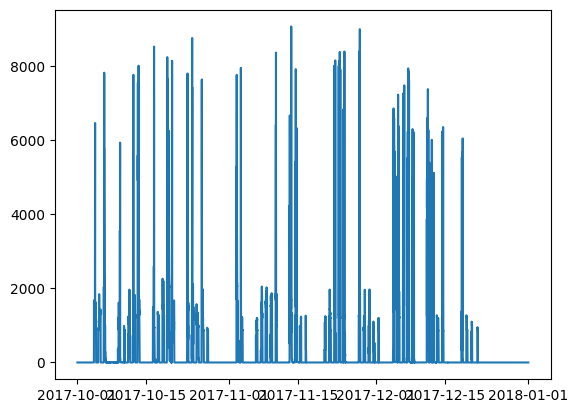

In [9]:
plt.plot(mains.index, mains[('power', 'apparent')])

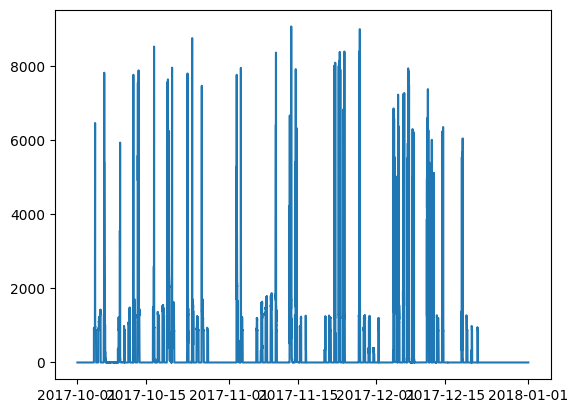

In [ ]:
plt.plot(mains.index, mains[('power', 'apparent')])

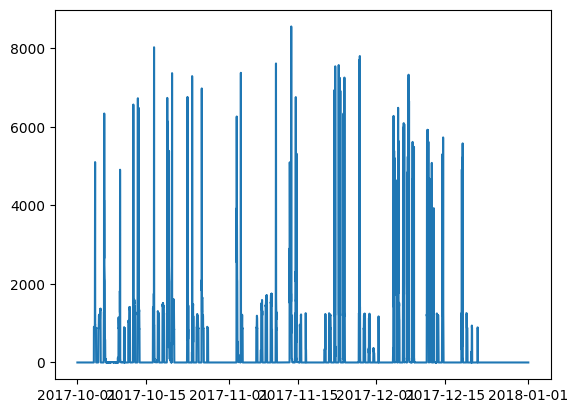

In [15]:
plt.plot(mains.index, mains[('power', 'apparent')])

In [12]:
mains.shape

(26508, 1)

In [ ]:
px.scatter(mains, x=mains.index, y=mains[('power', 'apparent')].values).update_traces(mode="lines+markers")

In [14]:
appliance_meters = elec.meters_directly_downstream_of_mains()

In [15]:
appliance_meters.__dict__

{'meters': [ElecMeter(instance=2, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=1)]),
  ElecMeter(instance=3, building=1, dataset='HIPE', appliances=[Appliance(type='oven', instance=1)]),
  ElecMeter(instance=4, building=1, dataset='HIPE', appliances=[Appliance(type='printer', instance=1)]),
  ElecMeter(instance=5, building=1, dataset='HIPE', appliances=[Appliance(type='motor', instance=2)])],
 'disabled_meters': [],
 'name': ''}

#### Noise

In [6]:
import pandas as pd
df = pd.read_csv("../nilmtk/dataset_converters/hipe/hipe_cleaned_v1_5min_agg_noise/MainTerminal_PhaseCount_3_geq_agg_2017-10-01_lt_2018-01-01 .csv", usecols=["Soldering_Oven", "Pick_and_Palce_S_kVA__mean"])

In [22]:
df_train_noise = df_noise[0:int(df_noise.shape[0]*2/3)]
df_test_noise = df_noise[int(df_noise.shape[0]*2/3):]

In [ ]:
import plotly.express as px
px.scatter(df_train_noise).update_traces(mode="lines+markers")


In [ ]:
import plotly.express as px
px.scatter(df_test_noise).update_traces(mode="lines+markers")


In [ ]:
import plotly.express as px
px.scatter(df_noise).update_traces(mode="lines+markers")


### Chip Saw (Motor 1)

In [16]:
appliance_meters.meters[0].name

'Chip Saw'

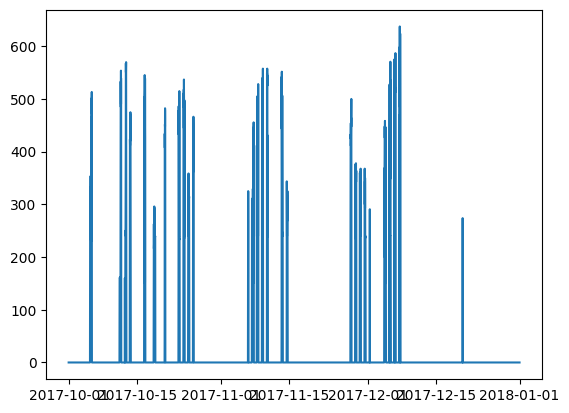

In [13]:
df_chip_saw = next(appliance_meters.meters[0].load())
plt.plot(df_chip_saw.index, df_chip_saw[('power', 'active')])

In [ ]:
px.scatter(df_chip_saw, x=df_chip_saw.index, y=df_chip_saw[('power', 'active')].values).update_traces(mode="lines+markers")

#### Missing values

In [21]:
import pandas as pd

pd.date_range(start=pd.to_datetime('2017-11-02  13:00:00').tz_localize('Europe/Berlin'), end = pd.to_datetime('2017-12-19 10:45:00').tz_localize('Europe/Berlin'), freq='15min').difference(df_chip_saw.index)


DatetimeIndex([], dtype='datetime64[ns, Europe/Berlin]', freq='15min')

In [22]:
print(f"Min: {df_chip_saw.values.min()} \n Max: {df_chip_saw.values.max()}")

Min: 0.0 
 Max: 735.9259279651774


In [23]:
df_chip_saw[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00     0.000000
2017-12-06 16:30:00+01:00     1.851852
2017-11-27 11:15:00+01:00     6.363636
2017-11-09 09:40:00+01:00    10.181818
2017-10-25 14:25:00+02:00    12.545454
2017-11-28 16:05:00+01:00    19.454546
2017-12-01 09:30:00+01:00    24.909091
2017-10-23 10:05:00+02:00    26.111111
2017-10-24 16:15:00+02:00    29.629630
2017-12-07 16:05:00+01:00    31.272728
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Chip Press')

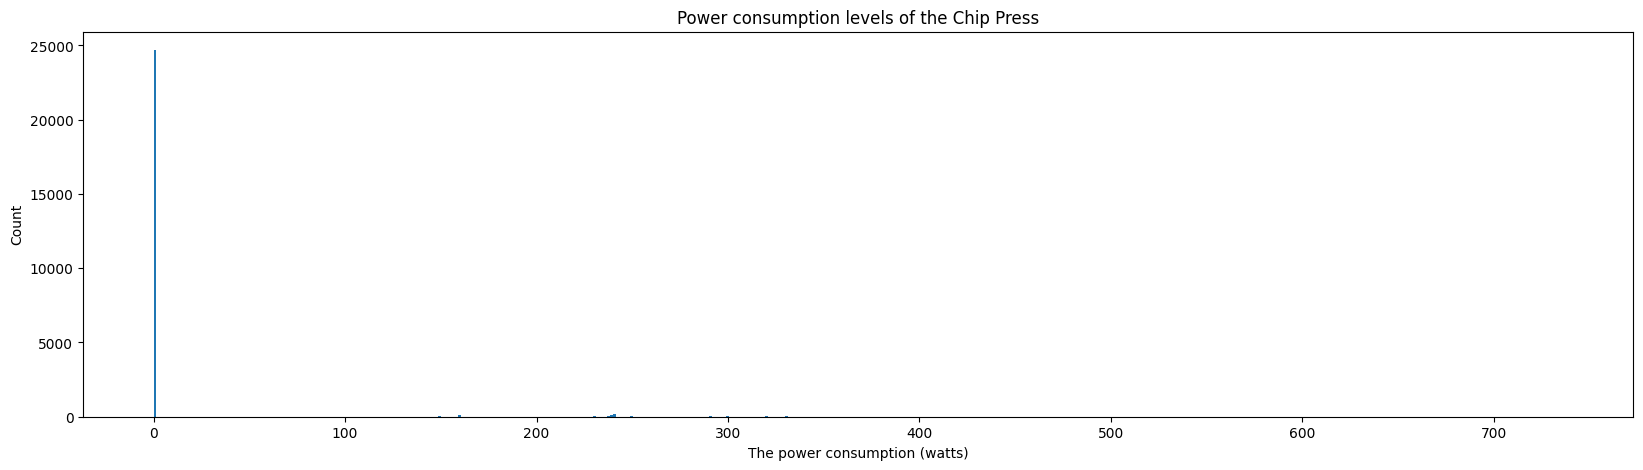

In [25]:
figure(figsize=(20,5))
_ = plt.hist(df_chip_saw[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Chip Press')

#### High Temperature Oven (Oven 1)

In [26]:
appliance_meters.meters[1].name


'High Temperature Oven'

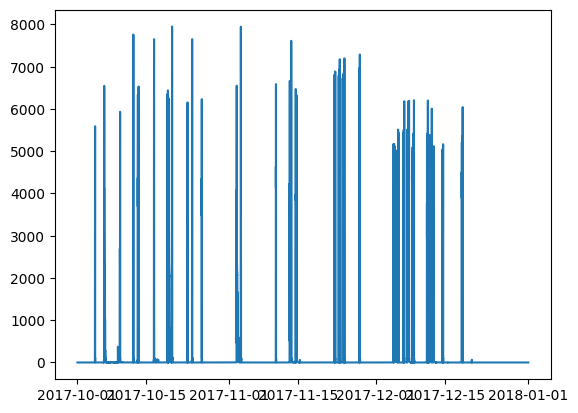

In [27]:
high_temperature_oven = next(appliance_meters.meters[1].load())
plt.plot(high_temperature_oven.index, high_temperature_oven[('power', 'active')])

In [ ]:
px.scatter(high_temperature_oven, x=high_temperature_oven.index, y=high_temperature_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [28]:
print(f"Min: {high_temperature_oven.values.min()} \n Max: {high_temperature_oven.values.max()}")

Min: 0.0 
 Max: 7952.545482462103


In [29]:
high_temperature_oven[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00    0.000000e+00
2017-12-18 09:20:00+01:00    1.210000e-14
2017-12-08 15:00:00+01:00    1.660000e-06
2017-12-11 06:25:00+01:00    1.727180e-06
2017-10-04 16:00:00+02:00    1.860000e-06
2017-10-06 10:00:00+02:00    1.818160e-01
2017-10-06 21:50:00+02:00    1.818200e-01
2017-10-09 10:40:00+02:00    1.851830e-01
2017-10-07 08:50:00+02:00    1.851870e-01
2017-10-09 15:25:00+02:00    1.886770e-01
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the High Temperature Oven')

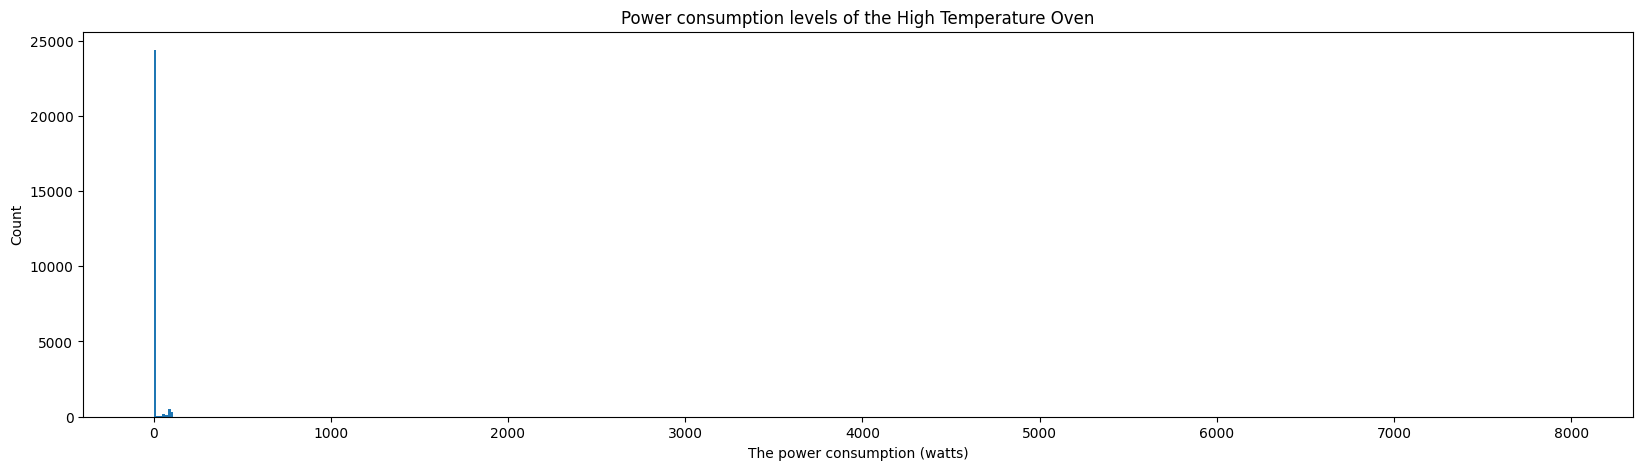

In [30]:
figure(figsize=(20,5))
_ = plt.hist(high_temperature_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the High Temperature Oven')

#### Screen Printer

In [31]:
appliance_meters.meters[2].name

'Screen Printer'

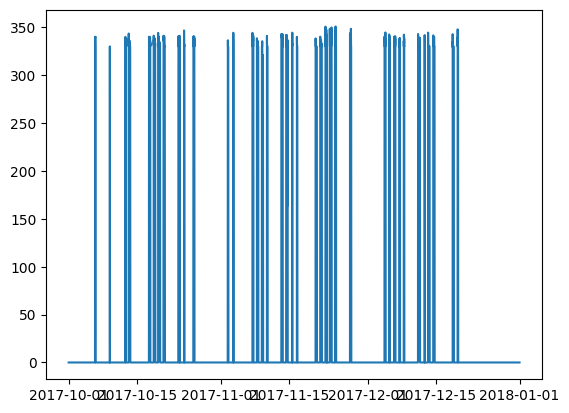

In [32]:
screen_printer = next(appliance_meters.meters[2].load())
plt.plot(screen_printer.index, screen_printer[('power', 'active')])

In [ ]:
px.scatter(screen_printer, x=screen_printer.index, y=screen_printer[('power', 'active')].values).update_traces(mode="lines+markers")

In [33]:
print(f"Min: {screen_printer.values.min()} \n Max: {screen_printer.values.max()}")

Min: 0.0 
 Max: 350.8196736945481


In [34]:
screen_printer[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00     0.000000
2017-11-22 08:50:00+01:00     5.166667
2017-11-15 15:10:00+01:00    10.819673
2017-12-12 15:25:00+01:00    11.000000
2017-11-13 08:55:00+01:00    14.500000
2017-10-24 15:00:00+02:00    16.500001
2017-11-22 15:00:00+01:00    22.000001
2017-11-22 15:20:00+01:00    26.666666
2017-10-06 09:15:00+02:00    30.666666
2017-11-27 09:10:00+01:00    31.311475
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Screen Printer')

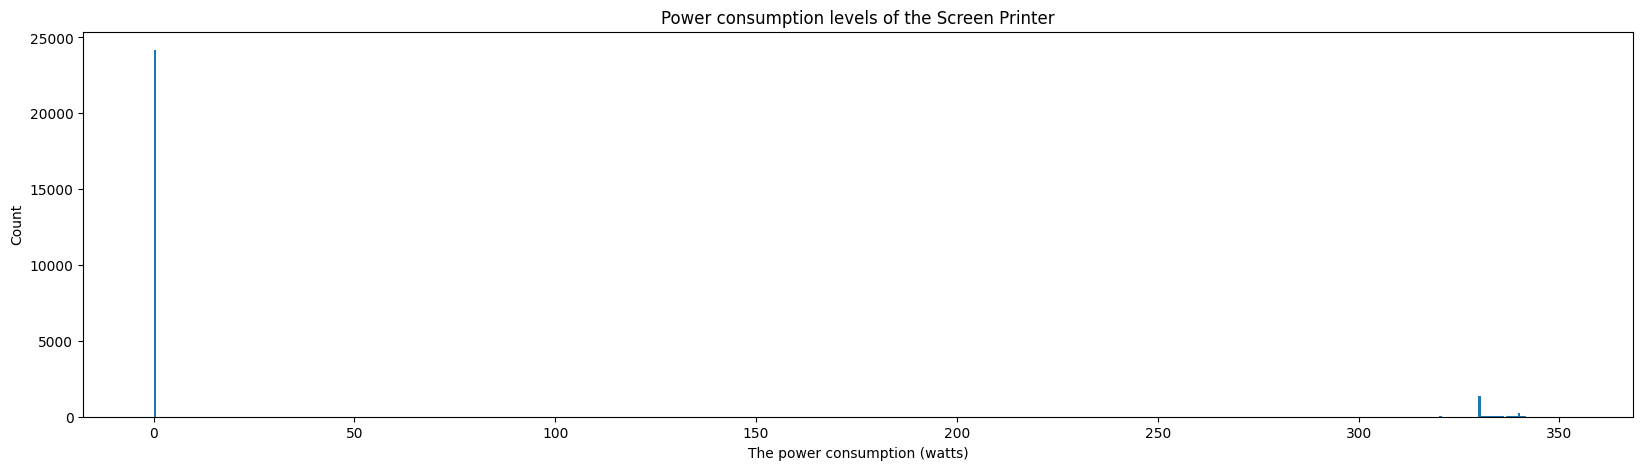

In [35]:
figure(figsize=(20,5))
_ = plt.hist(screen_printer[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Screen Printer')

#### Vacuum Pump(Motor 1)

In [38]:
appliance_meters.meters[3].name

'Vacuum Pump'

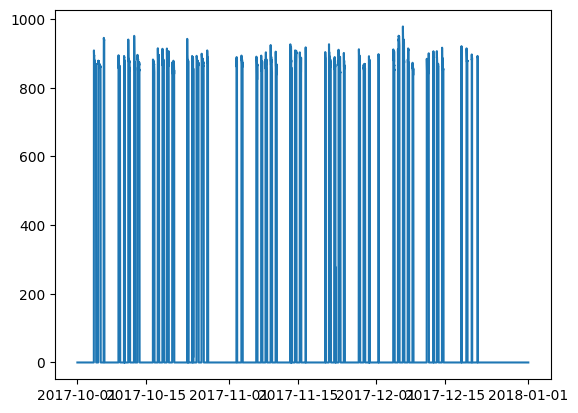

In [52]:
soldier_oven = next(appliance_meters.meters[3].load())
plt.plot(soldier_oven.index, soldier_oven[('power', 'active')])

In [ ]:
px.scatter(soldier_oven, x=soldier_oven.index, y=soldier_oven[('power', 'active')].values).update_traces(mode="lines+markers")

In [54]:
print(f"Min: {soldier_oven.values.min()} \n Max: {soldier_oven.values.max()}")

Min: 0.0 
 Max: 978.4662639093727


In [55]:
soldier_oven[('power','active')].drop_duplicates().nsmallest(10)


2017-10-01 00:00:00+02:00     0.000000
2017-11-09 16:45:00+01:00     4.268293
2017-11-03 16:30:00+01:00     5.365854
2017-10-24 15:00:00+02:00    14.478528
2017-11-16 14:00:00+01:00    41.524389
2017-11-27 15:45:00+01:00    42.839505
2017-10-23 14:30:00+02:00    52.111802
2017-10-12 13:15:00+02:00    55.925925
2017-11-22 15:00:00+01:00    62.926828
2017-10-20 18:15:00+02:00    63.658536
Name: (power, active), dtype: float64

Text(0.5, 1.0, 'Power consumption levels of the Soldering Oven')

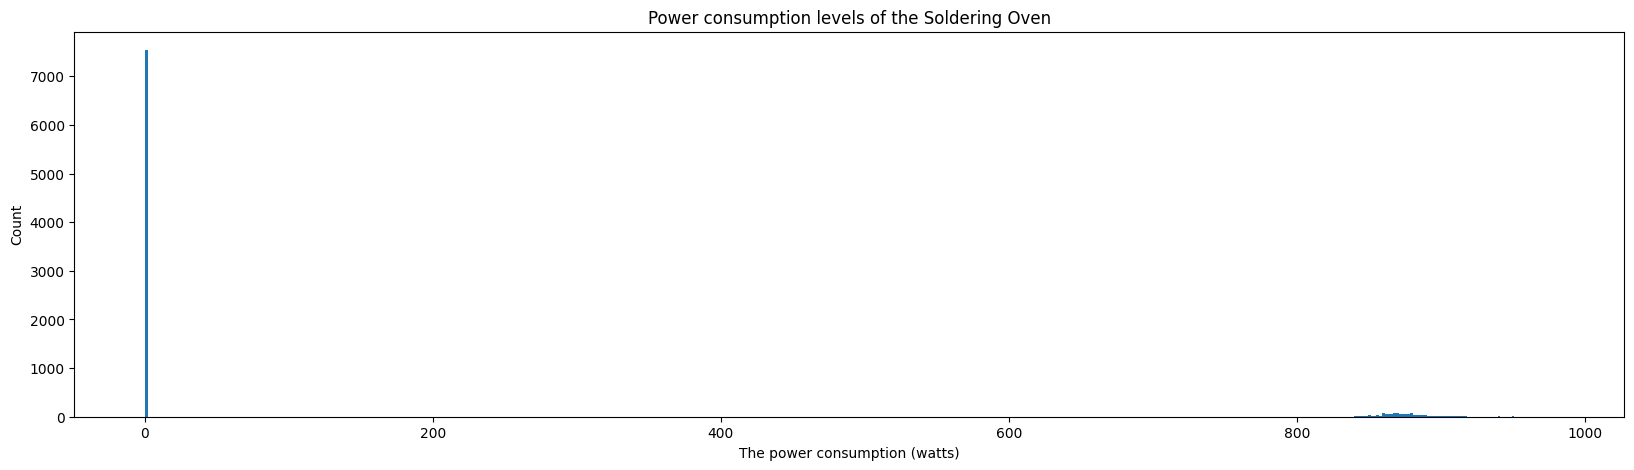

In [56]:
figure(figsize=(20,5))
_ = plt.hist(soldier_oven[('power', 'active')], bins=500)
plt.xlabel('The power consumption (watts)')
plt.ylabel('Count')
plt.title('Power consumption levels of the Soldering Oven')